In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib ipympl

In [15]:
from proj.models import GRUNet
from proj.dataloaders import PoseDataset, collate_fn, train_valid_split
from proj.experiment import Experiment
import wandb
import torch.nn as nn
from torch.utils.data import DataLoader
import torch

In [16]:
import pickle as pkl
import os 
os.getcwd()

'c:\\Users\\liamc\\Desktop\\fencing_vision\\src'

In [17]:
#Model Params
hidden_size = 128
input_size = 52
num_layers = 2
num_classes = 6
dropout =.15
model = GRUNet(input_size, hidden_size, num_layers, num_classes, dropout)

In [18]:
device='cuda:0'
ann_file = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\src\\vpd_fencing\\action_dataset\\fencing\\all.txt'
pose_path = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\data\\embeddings\\vpd_embs_7'
val_ids = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\src\\vpd_fencing\\action_dataset\\fencing\\val.ids.txt'
n_shot_file = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\src\\vpd_fencing\\action_dataset\\fencing\\train_16_1.ids.txt'
N_epoch=150
learning_rate = 1e-4
wd = .005
bs = 32
train_data, validation_data = train_valid_split(ann_file, 64, ['half step forward', 'half step backward',  'advancing', 'retreating', 'fleche', 'lunge'])
train_dataloader = DataLoader(PoseDataset(train_data, pose_dir = pose_path),batch_size= bs, collate_fn=collate_fn)
validation_dataloader = DataLoader(PoseDataset(validation_data, pose_path), collate_fn=collate_fn, batch_size=bs)
criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=wd)

In [19]:
data_batch = next(iter(train_dataloader))

In [20]:
data_batch

((tensor([[[ 0.8708,  0.3951, -0.5296,  ..., -0.7334,  0.3663, -1.0685],
           [ 1.0693,  0.4812, -0.5206,  ..., -0.8540,  0.3766, -1.0709],
           [ 1.3466,  0.5034, -0.4490,  ..., -0.9634,  0.4065, -0.9791],
           ...,
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
  
          [[ 0.1788,  0.8671,  1.3216,  ...,  1.0783,  1.2368, -1.0922],
           [ 0.2162,  0.9043,  1.1810,  ...,  0.9066,  1.2124, -1.0598],
           [ 0.2769,  0.8776,  1.0639,  ...,  0.8287,  0.9928, -0.9313],
           ...,
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
  
          [[ 0.6533,  2.0276,  0.8358,  ...,  0.3527,  1.0532, -1.3478],
           

In [21]:
exp = Experiment(criterion, optimizer, model, N_epoch, device, train_dataloader, validation_dataloader, 'testing_wb_integration', model_dir='..\\models\\ar_models',)


In [22]:
exp.load_model('C:\\Users\\liamc\\Desktop\\fencing_vision\\models\\ar_models\\gru_test.pt')
#exp.run(model_name = 'gru_test')

ToDo: Visualize Classifications
- Confusion Matrix
- Video Names and frames lister in dataloader.dataset.pose_labels. Translate those into video display and features. Display nn outpouts and video and correct label



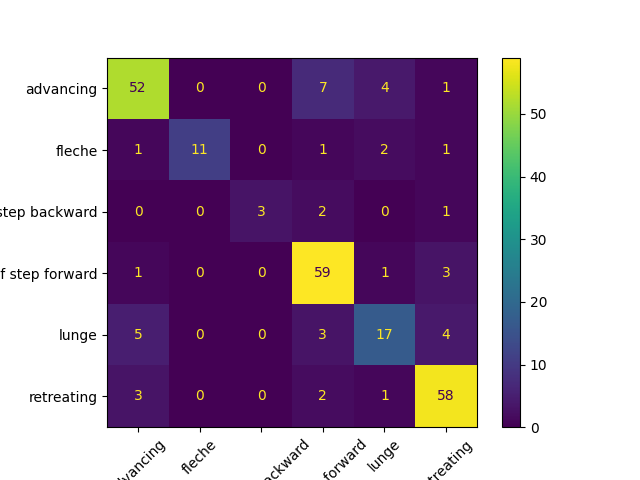

In [23]:
inds = exp.confusion_matrix()

In [11]:
decoder_path = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\models\\vpd_model7\\best_epoch.decoder.pt'


c:\Users\liamc\Desktop\fencing_vision\src\proj\models.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(decoded_x)
c:\Users\liamc\Desktop\fencing_vision\src\proj\experiment.py:108: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return torch.Tensor(ground_truth), torch.Tensor(predictions), np.array(input_data)
c:\Users\liamc\Desktop\fencing_vision\src\proj\experiment.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

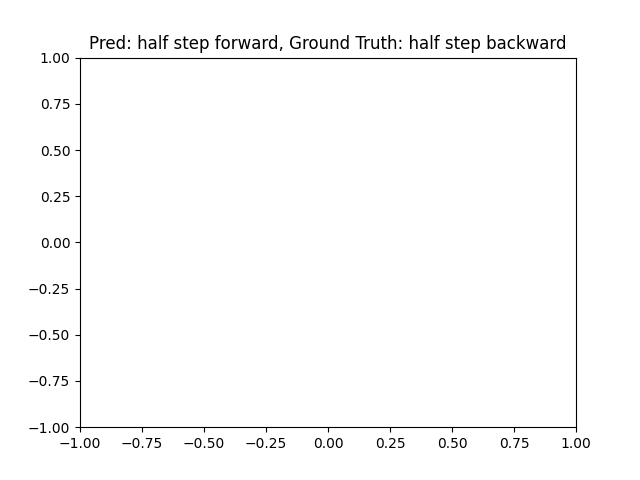

In [12]:
anim = exp.view_preds(decoder_path, correct=False)

In [15]:
anim

In [15]:
out[0][0][0].shape, out[0][0][1]

(torch.Size([10, 52]), tensor(5.))

In [23]:
len(out[0])

31

In [9]:
exp.score_report()

UnboundLocalError: local variable 'input_data' referenced before assignment

In [ ]:
validation_dataloader.dataset.label_dict
